In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv("frauddetection.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740152 entries, 0 to 740151
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             740152 non-null  int64  
 1   trans_date_trans_time  740152 non-null  object 
 2   cc_num                 740152 non-null  int64  
 3   merchant               740152 non-null  object 
 4   category               740152 non-null  object 
 5   amt                    740152 non-null  float64
 6   first                  740152 non-null  object 
 7   last                   740152 non-null  object 
 8   gender                 740152 non-null  object 
 9   street                 740152 non-null  object 
 10  city                   740152 non-null  object 
 11  state                  740152 non-null  object 
 12  zip                    740152 non-null  int64  
 13  lat                    740152 non-null  float64
 14  long                   740152 non-nu

In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,740152.000000,7.401520e+05,740152.000000,740152.000000,740152.000000,740152.000000,7.401520e+05,7.401520e+05,740152.000000,740151.000000,740151.000000
mean,370075.500000,4.165005e+17,70.244155,48775.243681,38.537827,-90.215619,8.915400e+04,1.339804e+09,38.537592,-90.216108,0.005918
std,213663.622558,1.307963e+18,158.034282,26904.117890,5.073410,13.763294,3.031534e+05,7.451105e+06,5.107772,13.775307,0.076699
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671242,0.000000
25%,185037.750000,1.800365e+14,9.650000,26237.000000,34.668900,-96.798000,7.430000e+02,1.333731e+09,34.741200,-96.888134,0.000000
50%,370075.500000,3.520550e+15,47.400000,48174.000000,39.354300,-87.461600,2.456000e+03,1.340215e+09,39.367707,-87.424573,0.000000
75%,555113.250000,4.642255e+15,83.050000,72011.000000,41.894800,-80.158000,2.047800e+04,1.345881e+09,41.954796,-80.216049,0.000000
max,740151.000000,4.992346e+18,26544.120000,99783.000000,66.693300,-67.950300,2.906700e+06,1.352690e+09,67.510267,-66.956540,1.000000


In [ ]:
df.shape

(190199, 23)

In [ ]:
#finding number of unique values in each column
print(df.nunique())

Unnamed: 0               740152
trans_date_trans_time    728519
cc_num                      951
merchant                    693
category                     14
amt                       42446
first                       345
last                        476
gender                        2
street                      951
city                        869
state                        51
zip                         938
lat                         936
long                        937
city_pop                    855
job                         488
dob                         936
trans_num                740152
unix_time                728551
merch_lat                723994
merch_long               733322
is_fraud                      2
dtype: int64


In [ ]:
missinginfo =df.isnull().sum()
print(missinginfo)

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               1
is_fraud                 1
dtype: int64


In [ ]:
# Drop rows with any missing values
train_df = df.dropna()

In [ ]:

missinginfo =df.isnull().sum()
print(missinginfo)

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [ ]:

labelcounts = df['is_fraud'].value_counts()

# Print the counts
print(labelcounts)

0.0    735771
1.0      4380
Name: is_fraud, dtype: int64


In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


Text(0, 0.5, 'is_fraud')

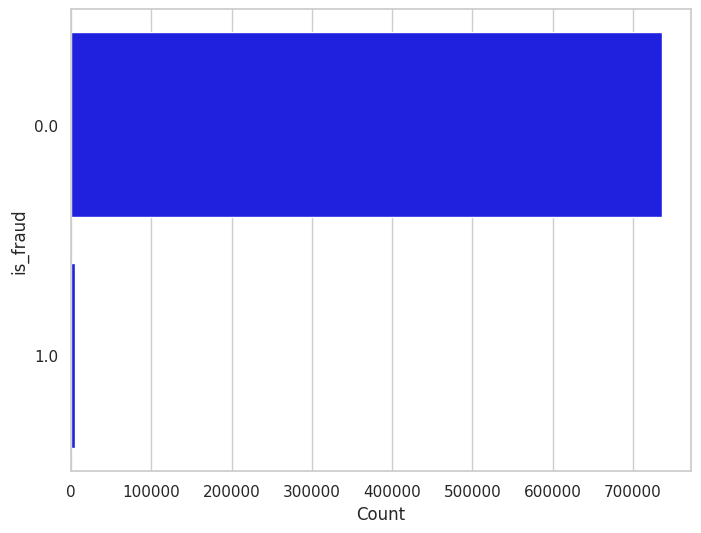

In [ ]:

# Set up Seaborn style
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))
counts = train_df.is_fraud.value_counts()
sns.barplot(x=counts, y=counts.index, color="blue", orient='h')
plt.xlabel('Count')
plt.ylabel('is_fraud')

as seen above, the class distribution is imbalanced

In [ ]:
#encoding object attributes
df['gender'] = df['gender'].map({'M': 0, 'F': 1})
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['month'] = df['trans_date_trans_time'].dt.month
df = df.drop(['Unnamed: 0', 'trans_date_trans_time', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1)
df = pd.get_dummies(df, columns=['category'], drop_first=True)




In [ ]:
df.head()

,cc_num,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2703186189652095,4.97,1,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0.0,...,0,0,0,0,1,0,0,0,0,0
1,630423337322,107.23,1,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0.0,...,1,0,0,0,0,0,0,0,0,0
2,38859492057661,220.11,0,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,45.00,0,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0.0,...,0,0,0,0,0,0,0,0,0,0
4,375534208663984,41.96,0,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0.0,...,0,0,0,0,0,1,0,0,0,0


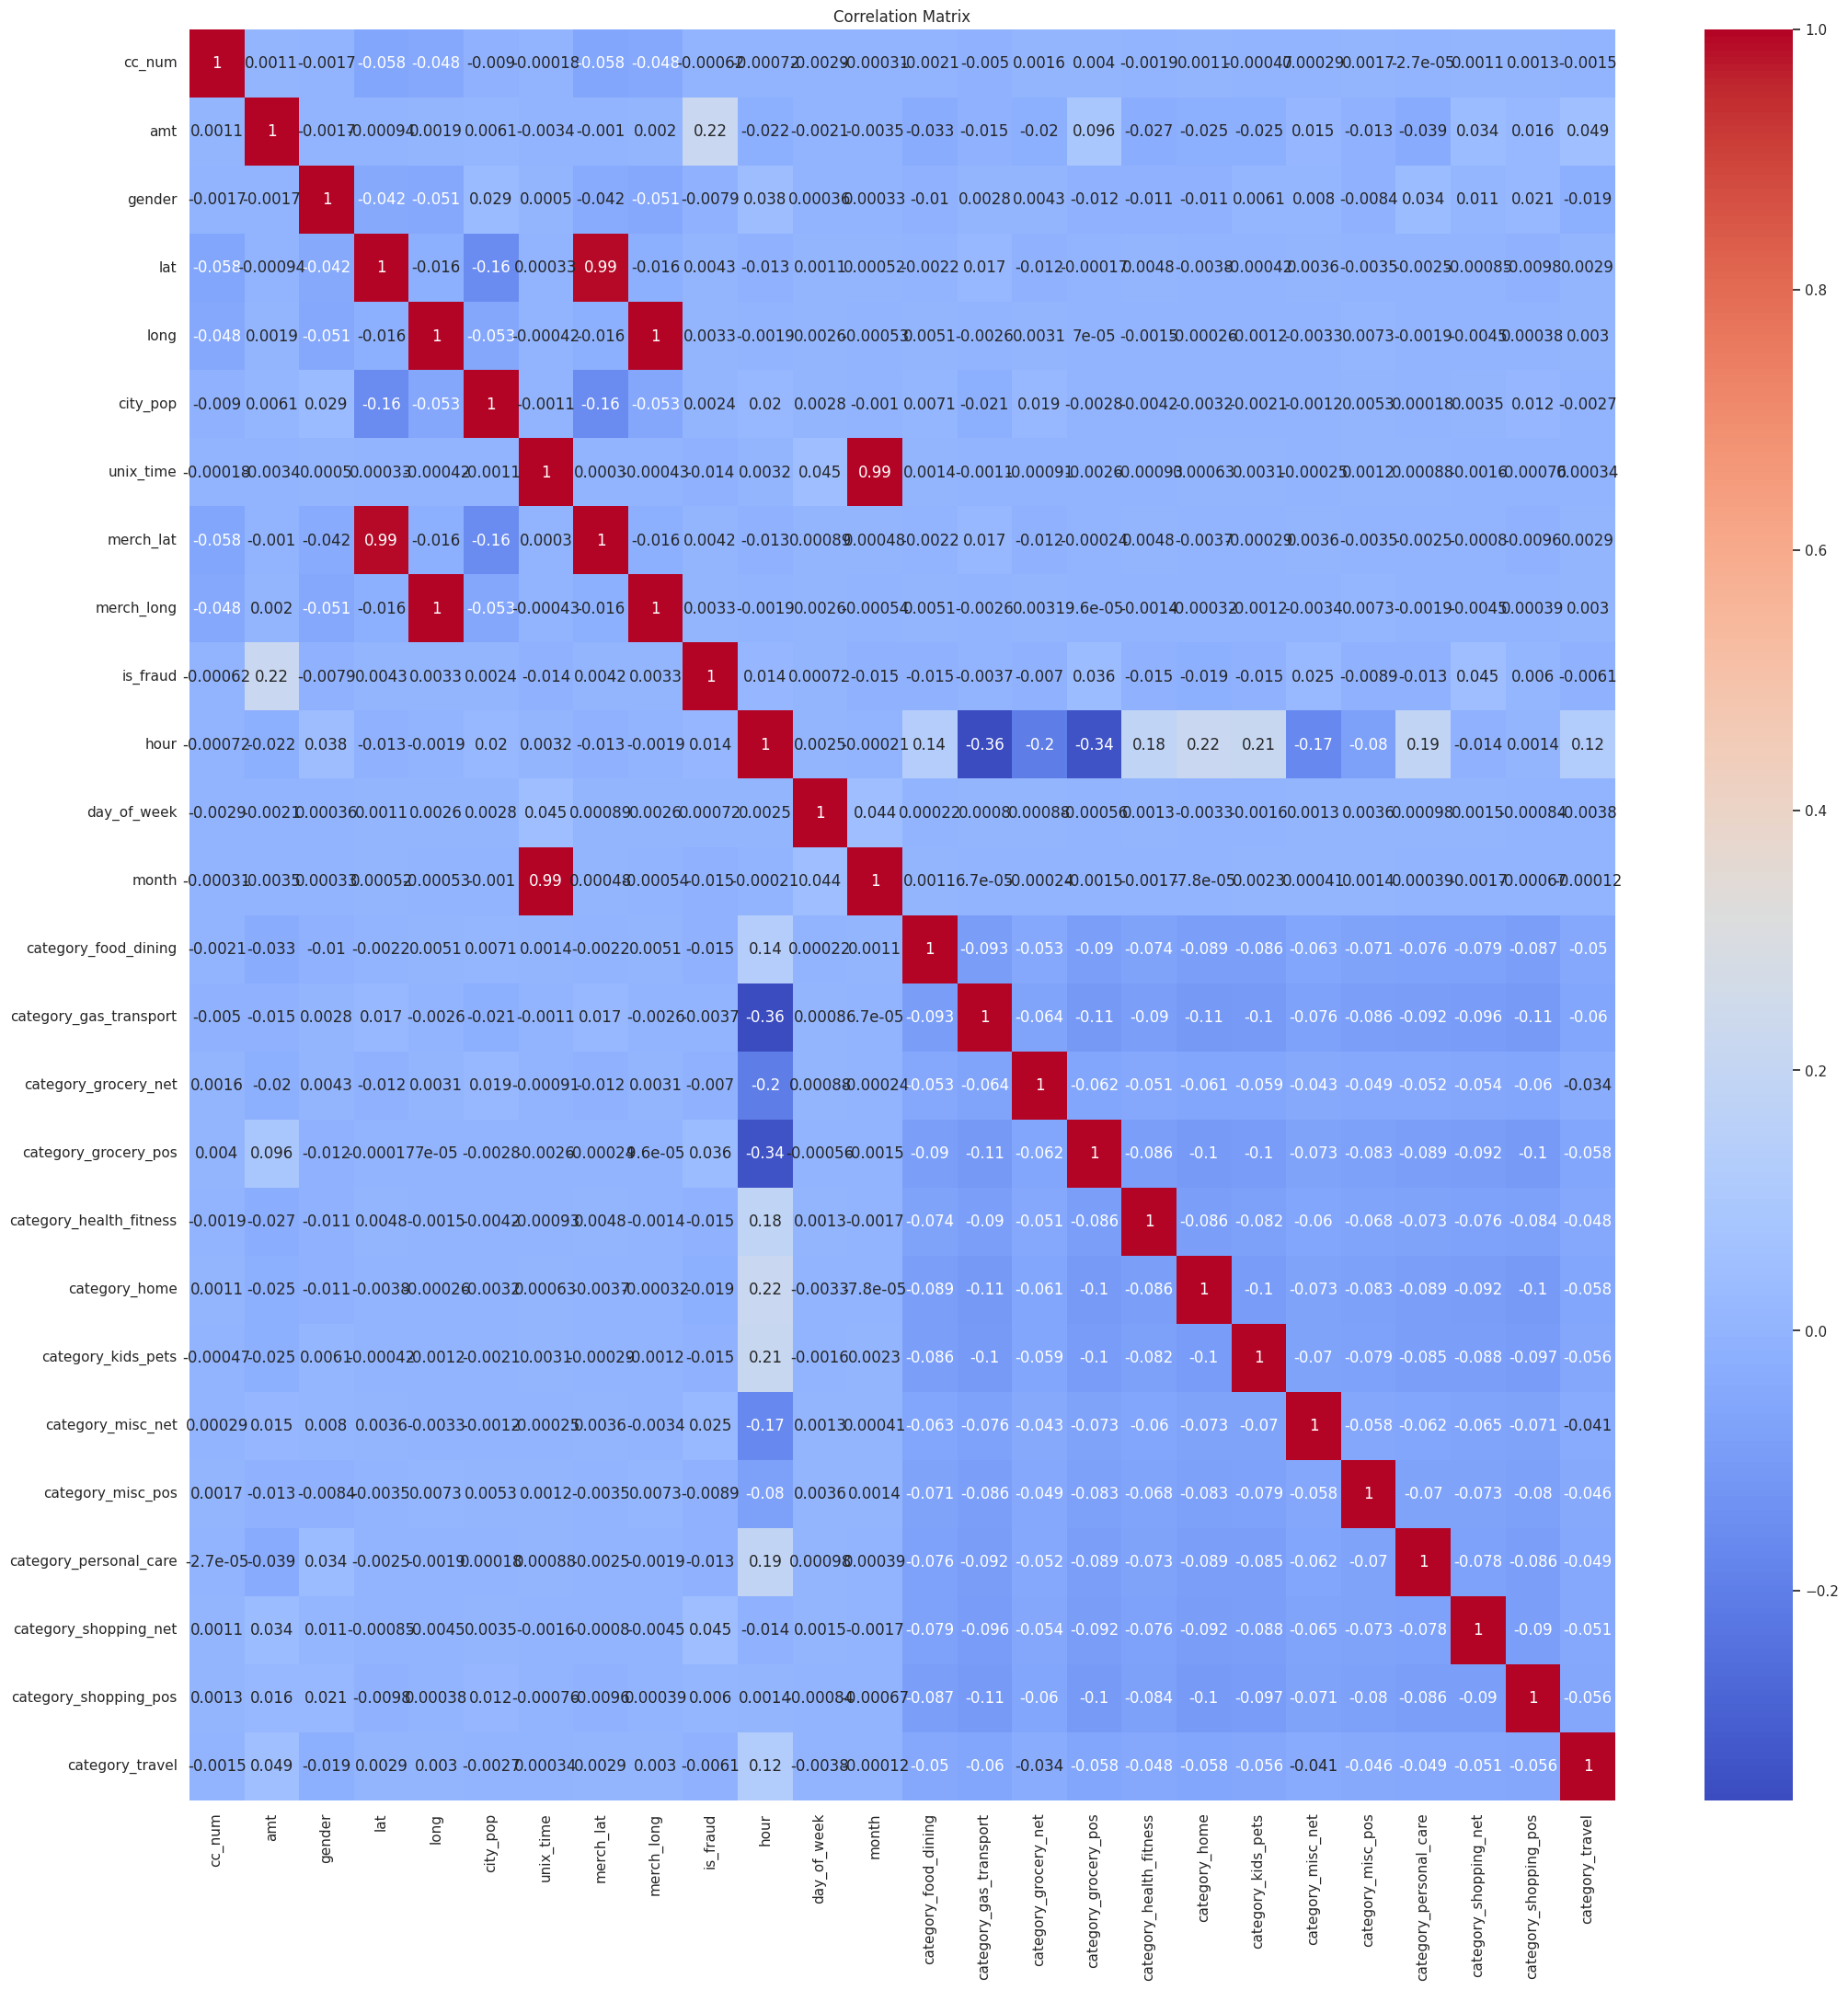

In [ ]:
#To Check Correlation of The Features with the Target Feature i.e. is_fraud
corr_matrix=df.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
best_features=corr_matrix.index[abs(corr_matrix['is_fraud'])>0.3]

In [ ]:
# over-sample the minority class i.e. is_fraud=1

majority_class = counts.idxmax()
n_samples = counts[majority_class]
over_sampled_dataset = df.groupby('is_fraud').apply(lambda x: x.sample(n_samples, replace=True)).reset_index(drop=True)

Text(0, 0.5, 'is_fraud')

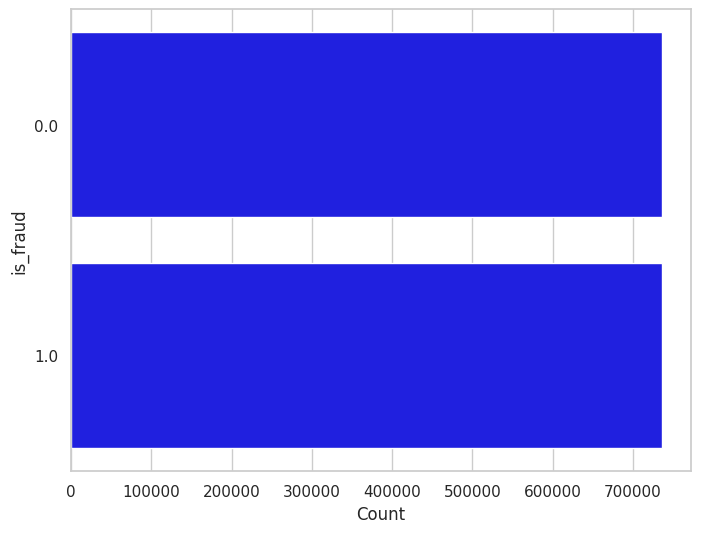

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))
over_sampled_counts = over_sampled_dataset.is_fraud.value_counts()
sns.barplot(x=over_sampled_counts, y=over_sampled_counts.index, color="blue", orient='h')
plt.xlabel('Count')
plt.ylabel('is_fraud')

In [ ]:
print('Original dataset shape is',df.shape)
print('over sampled dataset shape is ',over_sampled_dataset.shape)

Original dataset shape is (740151, 26)
over sampled dataset shape is  (1471542, 26)


In [ ]:
X= df.drop(['is_fraud'], axis=1)
y = df['is_fraud']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:


lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=0)
#analysing different models and performance
model_list = [lr,dt,rf]
train_acc = []
for i in model_list:
    i_model = i.fit(X_train,y_train)
    ypred_train = i_model.predict(X_train)
    ypred_test = i_model.predict(X_test)
    print(i)
    print(classification_report(y_test, ypred_test))
    train_acc.append(accuracy_score(y_test,ypred_test))
print(train_acc)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    147190
         1.0       0.00      0.00      0.00       841

    accuracy                           0.99    148031
   macro avg       0.50      0.50      0.50    148031
weighted avg       0.99      0.99      0.99    148031

DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    147190
         1.0       0.71      0.76      0.74       841

    accuracy                           1.00    148031
   macro avg       0.86      0.88      0.87    148031
weighted avg       1.00      1.00      1.00    148031

RandomForestClassifier(random_state=0)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    147190
         1.0       0.96      0.71      0.82       841

    accuracy                           1.00    148031
   macro avg       0.98      0.86      0.91    148031
weighted a

The accuracies obtained for the 3 models are

Logistic Regression:99.4%

Decision Tree: 99.6%

Random Forest: 99.8%

since the accuracies are considerably high, no hypertuning is required.